In [1]:
from music21 import converter, pitch

# Load the MusicXML file
file_path = "/workspaces/codespaces-jupyter/music/_Later_-_Rene_Liu_.mxl"
# file_path = "/workspaces/codespaces-jupyter/music/music_box_adapted_oct_shift.mxl" # Replace with your actual file path
score = converter.parse(file_path)

In [2]:
# Create a set to store unique notes
unique_notes = set()

# Iterate through all notes in the score
for note_obj in score.recurse().notes:
    # Handle both individual notes and chords
    if note_obj.isChord:
        # For chords, process each pitch in the chord
        for pitch_obj in note_obj.pitches:
            unique_notes.add(pitch_obj.nameWithOctave)
    elif note_obj.isNote:
        # For individual notes, add the pitch
        unique_notes.add(note_obj.pitch.nameWithOctave)

# Define a sorting function that sorts by octave and then by pitch class (C to B)
def pitch_sort_key(note_name):
    p = pitch.Pitch(note_name)
    # This sorts first by octave, then by diatonic pitch number (C=0, D=1, etc.)
    return (p.octave, p.pitchClass)

# Sort the notes using our custom function
sorted_unique_notes = sorted(unique_notes, key=pitch_sort_key)
print(sorted_unique_notes)

['E-2', 'F2', 'G2', 'A-2', 'B-2', 'C3', 'D3', 'E-3', 'F3', 'G3', 'A-3', 'B-3', 'C-3', 'C4', 'D4', 'E-4', 'F4', 'G4', 'A-4', 'B-4', 'C-4', 'C5', 'D5', 'E-5', 'F5', 'G5', 'A-5', 'B-5', 'C-5', 'C6']


In [3]:
# Group notes by octave
grouped_notes = {}
for note in sorted_unique_notes:
    # Get the octave number from the note name
    octave = int(''.join(filter(str.isdigit, note)))
    if octave not in grouped_notes:
        grouped_notes[octave] = []
    grouped_notes[octave].append(note)

# Iterate thru each key (octave) in the dictionary
print("Dictionary", grouped_notes, "\n", sep="\n")
print("Sorted by octave")
for octave in sorted(grouped_notes.keys()):
    print(" ".join(grouped_notes[octave]))

Dictionary
{2: ['E-2', 'F2', 'G2', 'A-2', 'B-2'], 3: ['C3', 'D3', 'E-3', 'F3', 'G3', 'A-3', 'B-3', 'C-3'], 4: ['C4', 'D4', 'E-4', 'F4', 'G4', 'A-4', 'B-4', 'C-4'], 5: ['C5', 'D5', 'E-5', 'F5', 'G5', 'A-5', 'B-5', 'C-5'], 6: ['C6']}


Sorted by octave
E-2 F2 G2 A-2 B-2
C3 D3 E-3 F3 G3 A-3 B-3 C-3
C4 D4 E-4 F4 G4 A-4 B-4 C-4
C5 D5 E-5 F5 G5 A-5 B-5 C-5
C6


In [4]:
music_box_notes = [
    'C2', 'D2', 'G2', 'A2', 'B2',
    'C3', 'D3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3', 'B3',
    'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4', 'A#4', 'B4',
    'C5', 'D5', 'E5'
]

In [5]:
def convert_to_music_box_notation(note_name):
    # Parse the note using music21
    p = pitch.Pitch(note_name)
    
    # Extract letter, accidental, and octave
    letter = p.step
    
    # Handle accidental
    if p.accidental is not None:
        if p.accidental.name == 'sharp':
            acc = '#'
        elif p.accidental.name == 'flat':
            # Always convert flat to equivalent sharp when possible
            flat_to_sharp = {
                'E': ('D', '#'),
                'B': ('A', '#'),
                'A': ('G', '#'),
                'D': ('C', '#'),
                'G': ('F', '#'),
                'C': ('B', ''),  # Special case: Cb -> B
                'F': ('E', '')   # Special case: Fb -> E
            }
            
            if letter in flat_to_sharp:
                # Get the new note and accidental
                new_letter, new_acc = flat_to_sharp[letter]
                
                # Adjust octave if needed (for C-flat and F-flat)
                octave_adj = -1 if letter in ['C', 'F'] else 0
                p = pitch.Pitch(new_letter + new_acc + str(p.octave + octave_adj))
                letter = p.step
                acc = new_acc
            else:
                acc = 'b'  # Keep flat if no conversion defined
        else:
            acc = ''
    else:
        acc = ''
    
    # Reset octave (music21's C2 = music box's C)
    music_box_octave = p.octave
    
    # Format according to music box notation
    if music_box_octave <= 0:
        return letter + acc
    else:
        return letter + acc + str(music_box_octave)

# Convert each note and check if it's available on the music box
converted_notes = []
availability = []

for note in sorted_unique_notes:
    music_box_note = convert_to_music_box_notation(note)
    converted_notes.append((note, music_box_note))
    if music_box_note in music_box_notes:
        availability.append("Available")
    else:
        availability.append("Not Available")

# Group notes by octave (using music21 octave for grouping)
grouped_notes = {}
for note, music_box_note, avail in zip(sorted_unique_notes, [n[1] for n in converted_notes], availability):
    p = pitch.Pitch(note)
    octave = str(p.octave)
    
    if octave not in grouped_notes:
        grouped_notes[octave] = []
    
    grouped_notes[octave].append((note, music_box_note, avail))

# Print the results in a nice side-by-side format
print("\nNote Comparison by Octave:\n")
print(f"{'Music21 Note':<12} {'Music Box Note':<14} {'Availability':<15}")
print("-" * 42)

for octave in sorted(grouped_notes.keys()):
    print(f"\nOctave {octave}:")
    for note, music_box_note, avail in grouped_notes[octave]:
        print(f"{note:<12} {music_box_note:<14} {avail:<15}")

# Print summary
available_count = availability.count("Available")
print(f"\nSummary: {available_count} out of {len(sorted_unique_notes)} notes are available on your music box.")
print(f"Coverage: {available_count/len(sorted_unique_notes)*100:.1f}%")

# List unavailable notes
unavailable_notes = [converted_notes[i][1] for i, avail in enumerate(availability) if avail == "Not Available"]
if unavailable_notes:
    print("\nUnavailable notes in music box notation:")
    print(", ".join(unavailable_notes))


Note Comparison by Octave:

Music21 Note Music Box Note Availability   
------------------------------------------

Octave 2:
E-2          D#2            Not Available  
F2           F2             Not Available  
G2           G2             Available      
A-2          G#2            Not Available  
B-2          A#2            Not Available  

Octave 3:
C3           C3             Available      
D3           D3             Available      
E-3          D#3            Not Available  
F3           F3             Available      
G3           G3             Available      
A-3          G#3            Available      
B-3          A#3            Available      
C-3          B2             Available      

Octave 4:
C4           C4             Available      
D4           D4             Available      
E-4          D#4            Available      
F4           F4             Available      
G4           G4             Available      
A-4          G#4            Available      
B-4          A#

In [6]:
# Add after your existing summary
print("\nAvailability Chart:")
for octave in sorted(grouped_notes.keys()):
    octave_notes = [n[0] for n in grouped_notes[octave]]
    octave_avail = [n[2] == "Available" for n in grouped_notes[octave]]
    
    print(f"Octave {octave}: ", end="")
    for note, avail in zip(octave_notes, octave_avail):
        # Print available notes in green, unavailable in red (if in terminal that supports color)
        marker = "✓" if avail else "✗"
        print(f"{note}({marker}) ", end="")
    print()


Availability Chart:
Octave 2: E-2(✗) F2(✗) G2(✓) A-2(✗) B-2(✗) 
Octave 3: C3(✓) D3(✓) E-3(✗) F3(✓) G3(✓) A-3(✓) B-3(✓) C-3(✓) 
Octave 4: C4(✓) D4(✓) E-4(✓) F4(✓) G4(✓) A-4(✓) B-4(✓) C-4(✓) 
Octave 5: C5(✓) D5(✓) E-5(✗) F5(✗) G5(✗) A-5(✗) B-5(✗) C-5(✓) 
Octave 6: C6(✗) 


In [7]:
print("\nTransposition Analysis:")
for semitones in range(-8, 9):
    if semitones == 0:
        continue  # Skip original key
        
    transposed_notes = []
    for note in sorted_unique_notes:
        p = pitch.Pitch(note)
        p.transpose(semitones, inPlace=True)
        transposed_note = convert_to_music_box_notation(p.nameWithOctave)
        transposed_notes.append(transposed_note)
    
    avail_count = sum(1 for note in transposed_notes if note in music_box_notes)
    print(f"Transposing by {semitones:+d} semitones: {avail_count}/{len(sorted_unique_notes)} notes available ({avail_count/len(sorted_unique_notes)*100:.1f}%)")


Transposition Analysis:
Transposing by -8 semitones: 23/30 notes available (76.7%)
Transposing by -7 semitones: 17/30 notes available (56.7%)
Transposing by -6 semitones: 20/30 notes available (66.7%)
Transposing by -5 semitones: 21/30 notes available (70.0%)
Transposing by -4 semitones: 17/30 notes available (56.7%)
Transposing by -3 semitones: 24/30 notes available (80.0%)
Transposing by -2 semitones: 16/30 notes available (53.3%)
Transposing by -1 semitones: 21/30 notes available (70.0%)
Transposing by +1 semitones: 18/30 notes available (60.0%)
Transposing by +2 semitones: 20/30 notes available (66.7%)
Transposing by +3 semitones: 16/30 notes available (53.3%)
Transposing by +4 semitones: 21/30 notes available (70.0%)
Transposing by +5 semitones: 16/30 notes available (53.3%)
Transposing by +6 semitones: 19/30 notes available (63.3%)
Transposing by +7 semitones: 17/30 notes available (56.7%)
Transposing by +8 semitones: 16/30 notes available (53.3%)


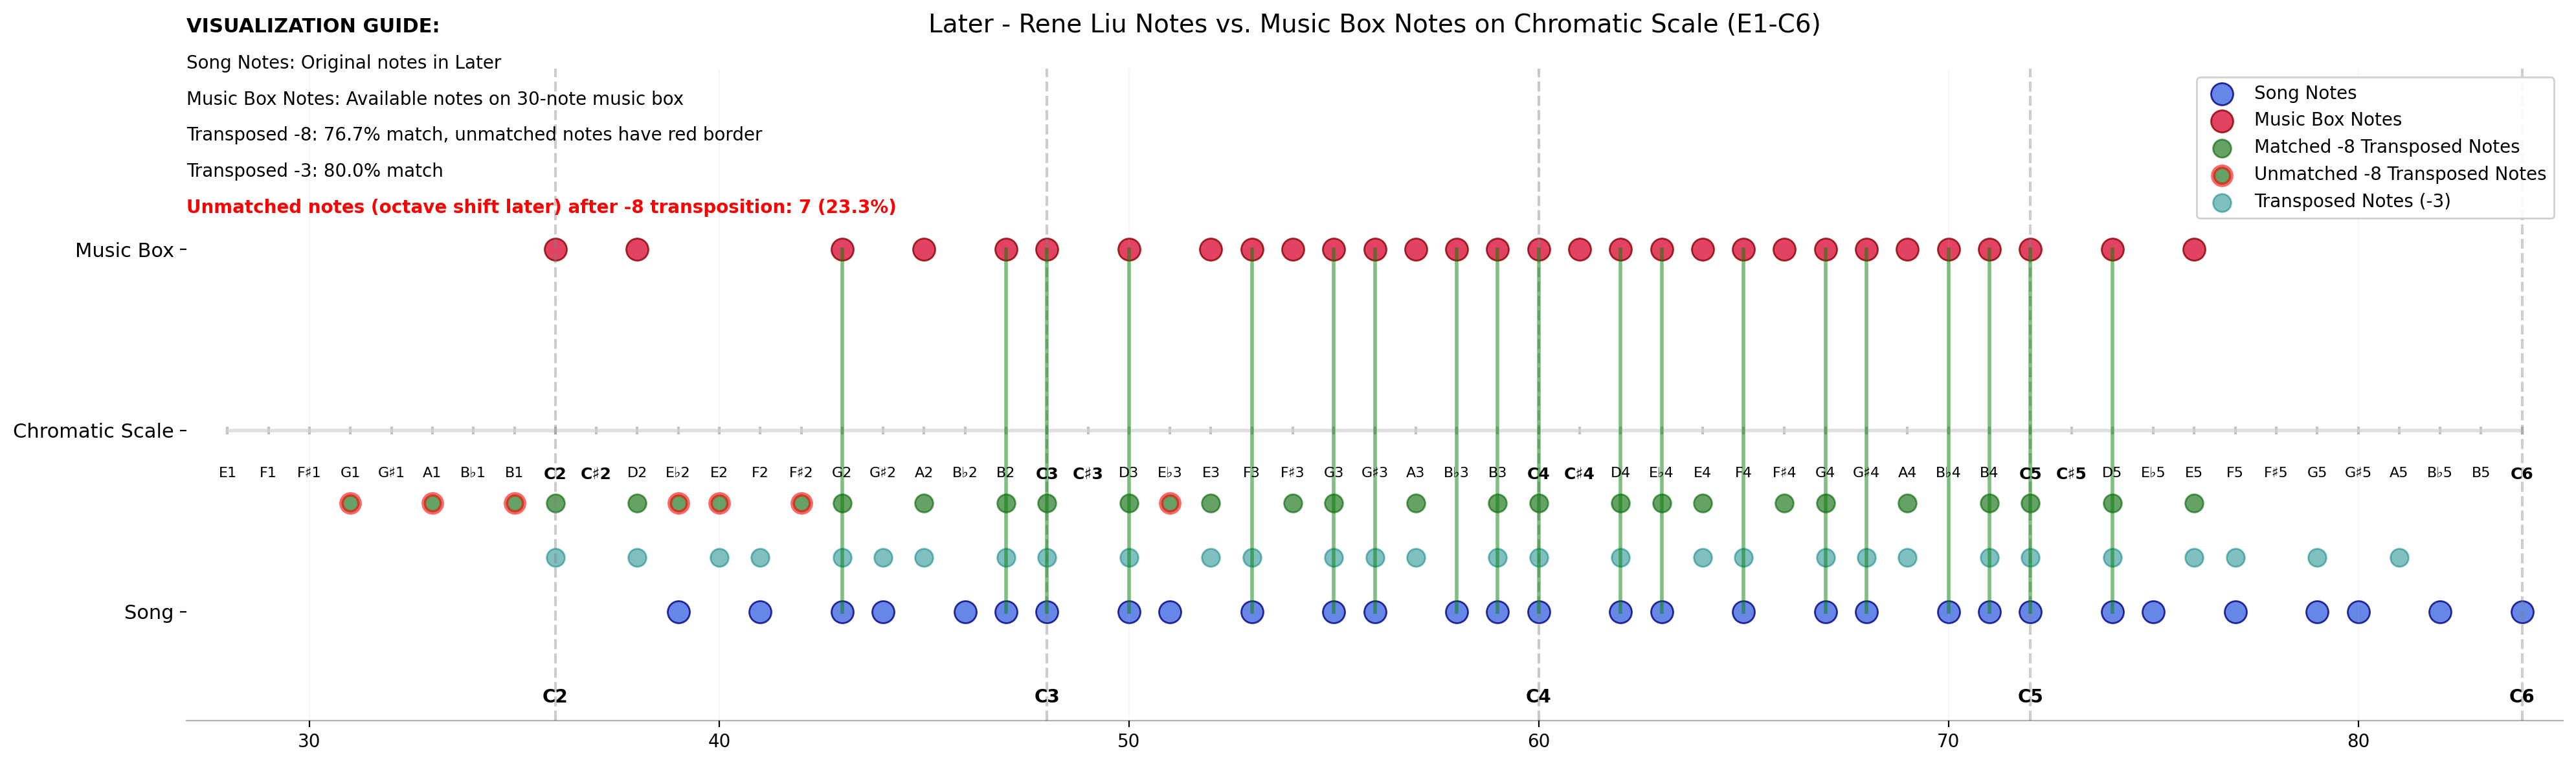

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from music21 import pitch

def create_improved_chromatic_chart():
    """Create a chromatic reference chart highlighting unmatched notes"""
    # Create full chromatic scale C2 to C6
    all_notes = []
    all_midi_numbers = []
    
    # Start with C2 (MIDI 36) and go to C6 (MIDI 84)
    for midi_num in range(28, 85):
        p = pitch.Pitch()
        p.midi = midi_num
        all_notes.append(p.nameWithOctave)
        all_midi_numbers.append(midi_num)
    
    # Create a figure with proper size and better aspect ratio
    plt.figure(figsize=(20, 6))
    
    # Create more space between elements
    row_positions = {
        'song': 1.0,
        'reference': 2.0,
        'music_box': 3.0,
        'oct': 2.6
    }
    
    # Plot the reference scale as a clear horizontal line
    plt.plot([28, 84], [row_positions['reference'], row_positions['reference']], 
             color='lightgray', linewidth=2, alpha=0.7)
    plt.scatter(all_midi_numbers, [row_positions['reference']] * len(all_notes), 
                s=20, color='darkgray', alpha=0.7, marker='|')
    
    # Get song notes and convert to MIDI numbers
    song_notes_midi = []
    for note_name in sorted_unique_notes:
        p = pitch.Pitch(note_name)
        song_notes_midi.append(p.midi)
    
    # Plot song notes with a stronger color and better contrast
    plt.scatter(song_notes_midi, [row_positions['song']] * len(song_notes_midi), 
                s=150, color='royalblue', alpha=0.8, marker='o', edgecolor='navy', label='Song Notes')
    
    # Convert music box notes to proper format
    music_box_midi = []
    for note in music_box_notes:            
        p = pitch.Pitch(note)
        music_box_midi.append(p.midi)
    
    # Plot music box notes with a stronger color and better contrast
    plt.scatter(music_box_midi, [row_positions['music_box']] * len(music_box_midi), 
                s=150, color='crimson', alpha=0.8, marker='o', edgecolor='darkred', label='Music Box Notes')
    
    # Add clearer octave dividers
    for octave in range(2, 7):
        midi_num = (octave * 12) + 12  # C for each octave
        plt.axvline(x=midi_num, color='gray', linestyle='--', alpha=0.4)
        plt.text(midi_num, 0.5, f"C{octave}", ha='center', fontweight='bold', fontsize=10)
    
    # Mark key notes on the reference scale
    for midi_num in range(28, 85):
        p = pitch.Pitch()
        p.midi = midi_num
        note_name = p.nameWithOctave
        
        # Only label C, E, G, and B more prominently
        if 'C' in note_name:
            plt.text(midi_num, row_positions['reference'] - 0.2, note_name.replace('-', '♭').replace('#', '♯'), 
                     ha='center', va='top', fontsize=9, fontweight='bold')
        else:
            plt.text(midi_num, row_positions['reference'] - 0.2, note_name.replace('-', '♭').replace('#', '♯'), 
                        ha='center', va='top', fontsize=8)
    
    # Mark areas of overlap with clearer connecting lines
    for midi_num in set(song_notes_midi).intersection(set(music_box_midi)):
        plt.plot([midi_num, midi_num], 
                 [row_positions['song'], row_positions['music_box']], 
                 'g-', alpha=0.5, linewidth=2)
    
    # Visualize the -8 semitone transposition
    oct_transpose = -8
    shifted_oct_midi = [m + oct_transpose for m in song_notes_midi]
    
    # Separate matched and unmatched notes after -8 transposition
    oct_matched = [note for note in shifted_oct_midi if note in music_box_midi]
    oct_unmatched = [note for note in shifted_oct_midi if note not in music_box_midi]
    
    # Plot matched notes
    plt.scatter(oct_matched, [row_positions['song'] + 0.6] * len(oct_matched), 
                s=100, color='darkgreen', alpha=0.6, marker='o', 
                label='Matched -8 Transposed Notes')
    
    # Plot unmatched notes with distinctive red border
    if oct_unmatched:
        plt.scatter(oct_unmatched, [row_positions['song'] + 0.6] * len(oct_unmatched), 
                    s=100, color='darkgreen', alpha=0.6, marker='o', 
                    edgecolor='red', linewidth=2.5, label='Unmatched -8 Transposed Notes')
    
    # Visualize the -3 semitone transposition
    tri_transpose = -3
    shifted_tri_midi = [m + tri_transpose for m in song_notes_midi]
    plt.scatter(shifted_tri_midi, [row_positions['song'] + 0.3] * len(shifted_tri_midi), 
                s=100, color='teal', alpha=0.5, marker='o', label='Transposed Notes (-3)')    
    
    # Count matches after transposition
    matches_oct_transpose = len(oct_matched)
    matches_tri_transpose = sum(1 for m in shifted_tri_midi if m in music_box_midi)
    oct_percentage = (matches_oct_transpose / len(song_notes_midi)) * 100
    tri_percentage = (matches_tri_transpose / len(song_notes_midi)) * 100
    
    # Add a more integrated legend/explanation
    plt.text(27, 4.2, "VISUALIZATION GUIDE:", fontsize=11, fontweight='bold')
    plt.text(27, 4.0, "Song Notes: Original notes in Later", fontsize=10)
    plt.text(27, 3.8, "Music Box Notes: Available notes on 30-note music box", fontsize=10)
    plt.text(27, 3.6, f"Transposed -8: {oct_percentage:.1f}% match, unmatched notes have red border", fontsize=10)
    plt.text(27, 3.4, f"Transposed -3: {tri_percentage:.1f}% match", fontsize=10)
    
    # Count unmatched notes
    unmatched_count = len(oct_unmatched)
    plt.text(27, 3.2, f"Unmatched notes (octave shift later) after -8 transposition: {unmatched_count} ({unmatched_count/len(song_notes_midi)*100:.1f}%)", 
             fontsize=10, color='red', fontweight='bold')
    
    # Set up the layout with better labeling
    plt.yticks([row_positions['song'], row_positions['reference'], row_positions['music_box']], 
              ['Song', 'Chromatic Scale', 'Music Box'], fontsize=11)
    
    plt.title('Later - Rene Liu Notes vs. Music Box Notes on Chromatic Scale (E1-C6)', fontsize=14, pad=20)
    plt.xlim(27, 85)
    plt.ylim(0.4, 4.0)
    
    # Clean up axes
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_alpha(0.3)
    
    # Add subtle grid for better readability
    plt.grid(axis='x', alpha=0.1)
    
    # Move legend to a better position
    plt.legend(loc='upper right', framealpha=0.9)
    
    plt.tight_layout()
    plt.show()

# Run the improved visualization
create_improved_chromatic_chart()

Successfully saved adaptation to /workspaces/codespaces-jupyter/music/music_box_advanced_adaptation.mxl

Advanced Music Box Adaptation Summary:
Total notes: 1561
Direct matches after -8 semitone transposition: 1343 (86.0%)
Notes requiring octave shift: 218 (14.0%)
Notes requiring fine-tuning: 10 (0.6%)
Perfect matches after all adjustments: 1551 (99.4%)


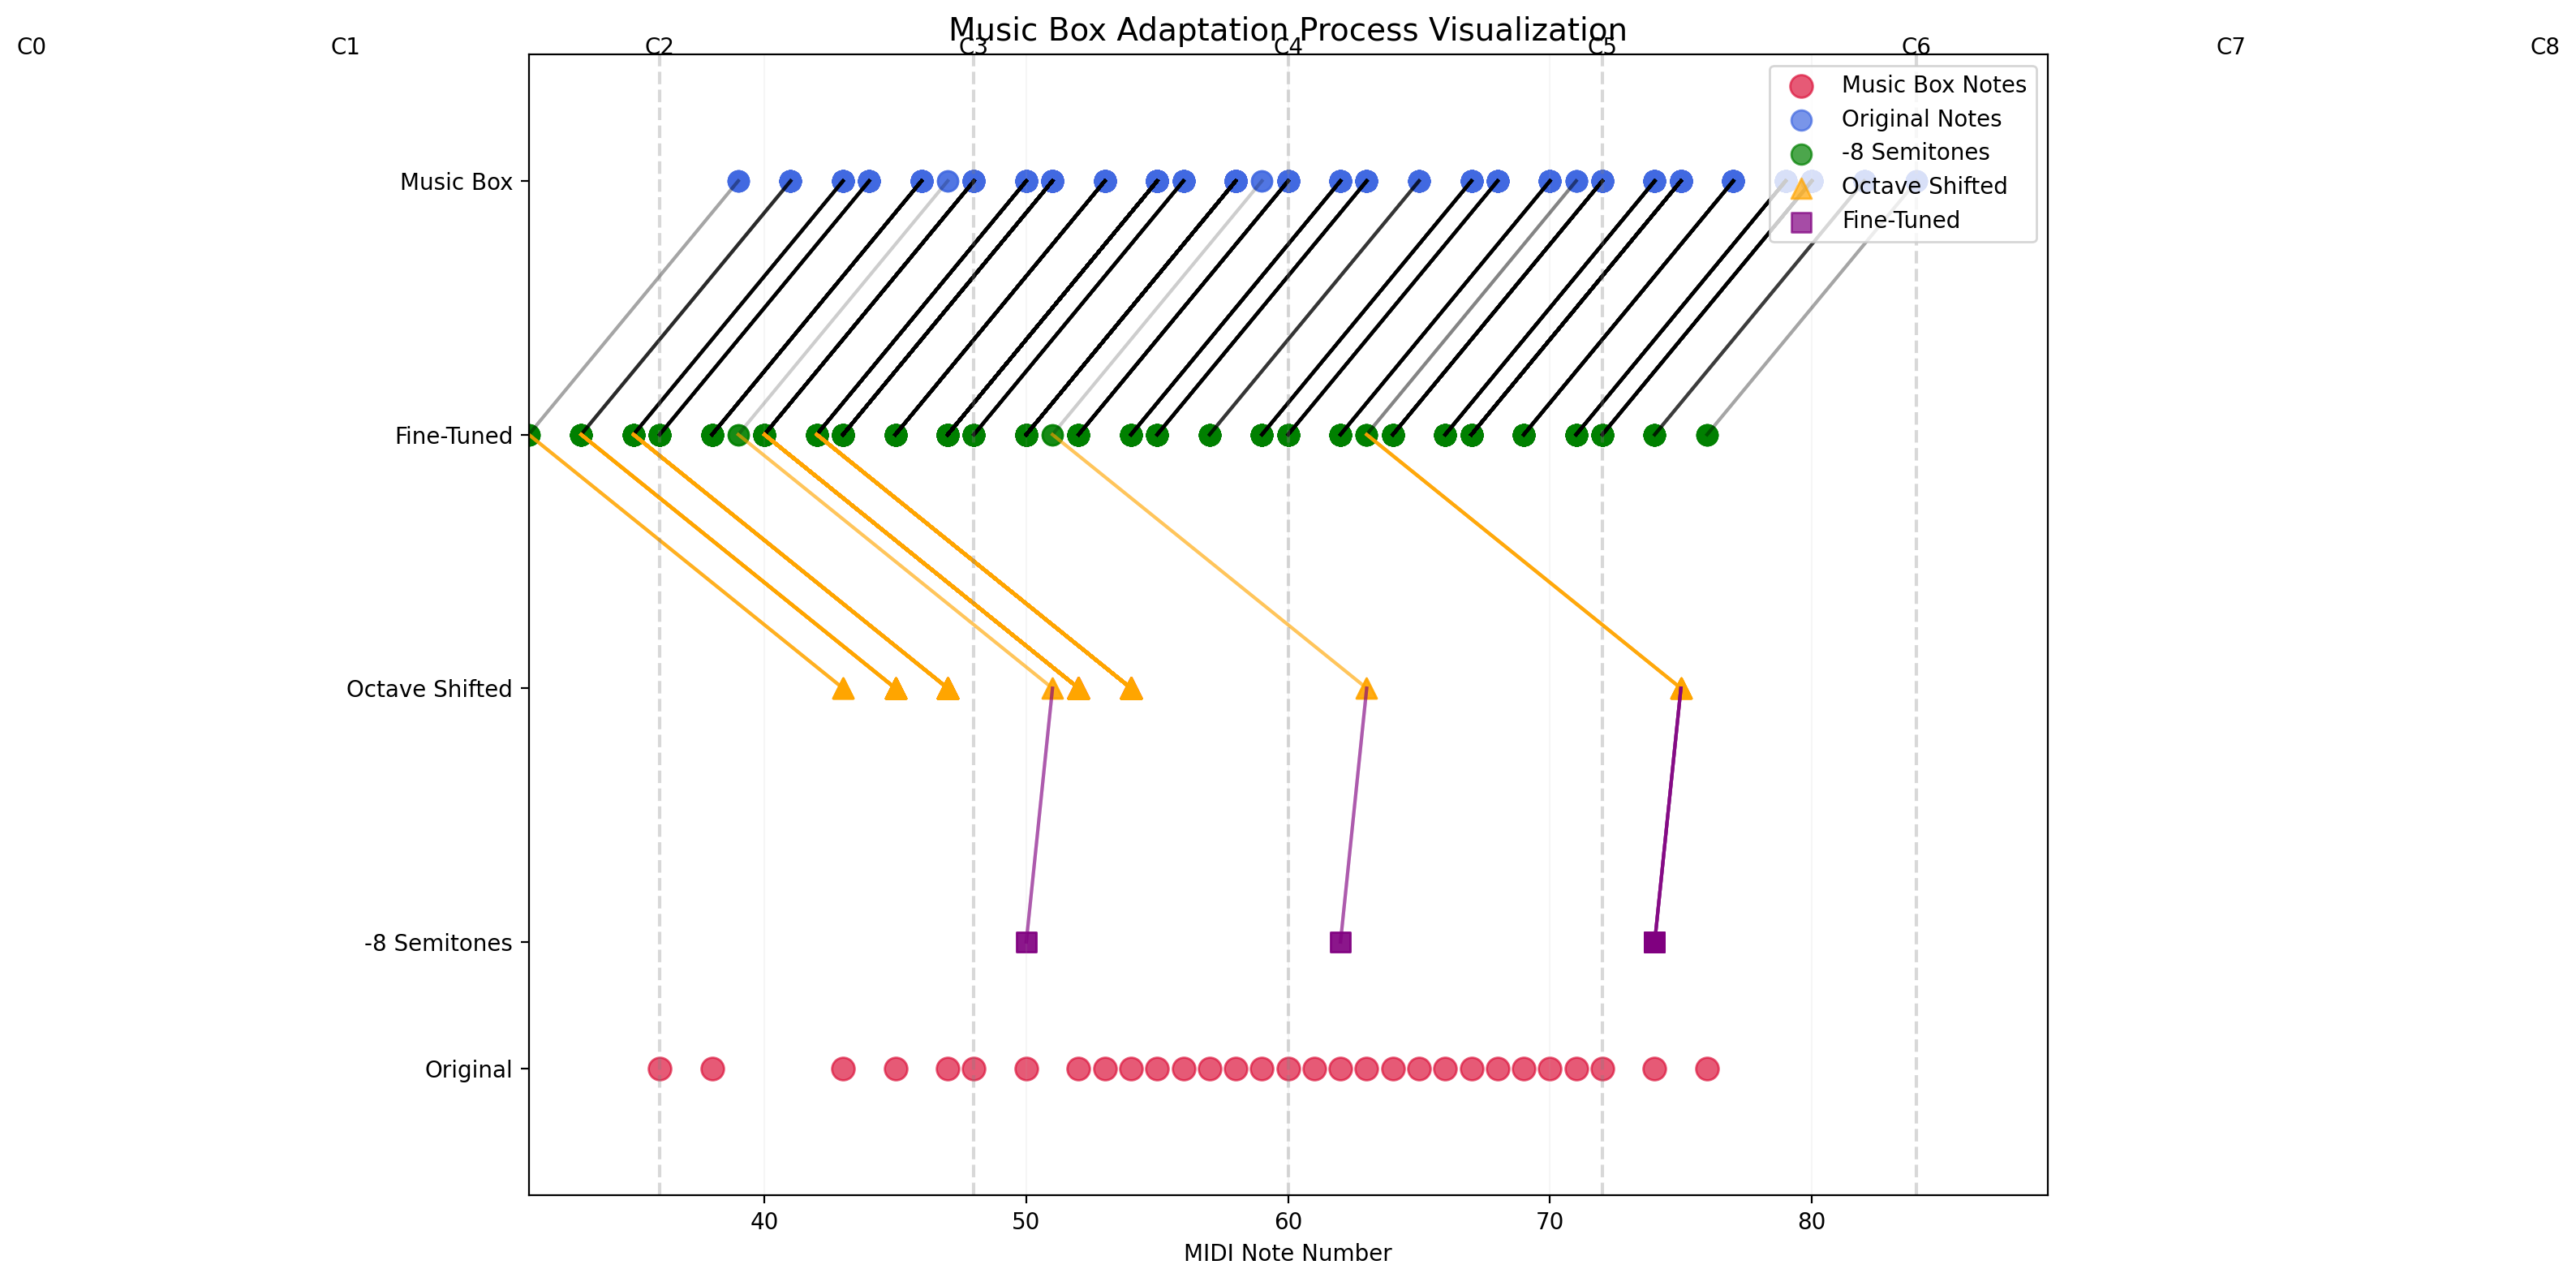

ValueError: Wedge sizes 'x' must be non negative values

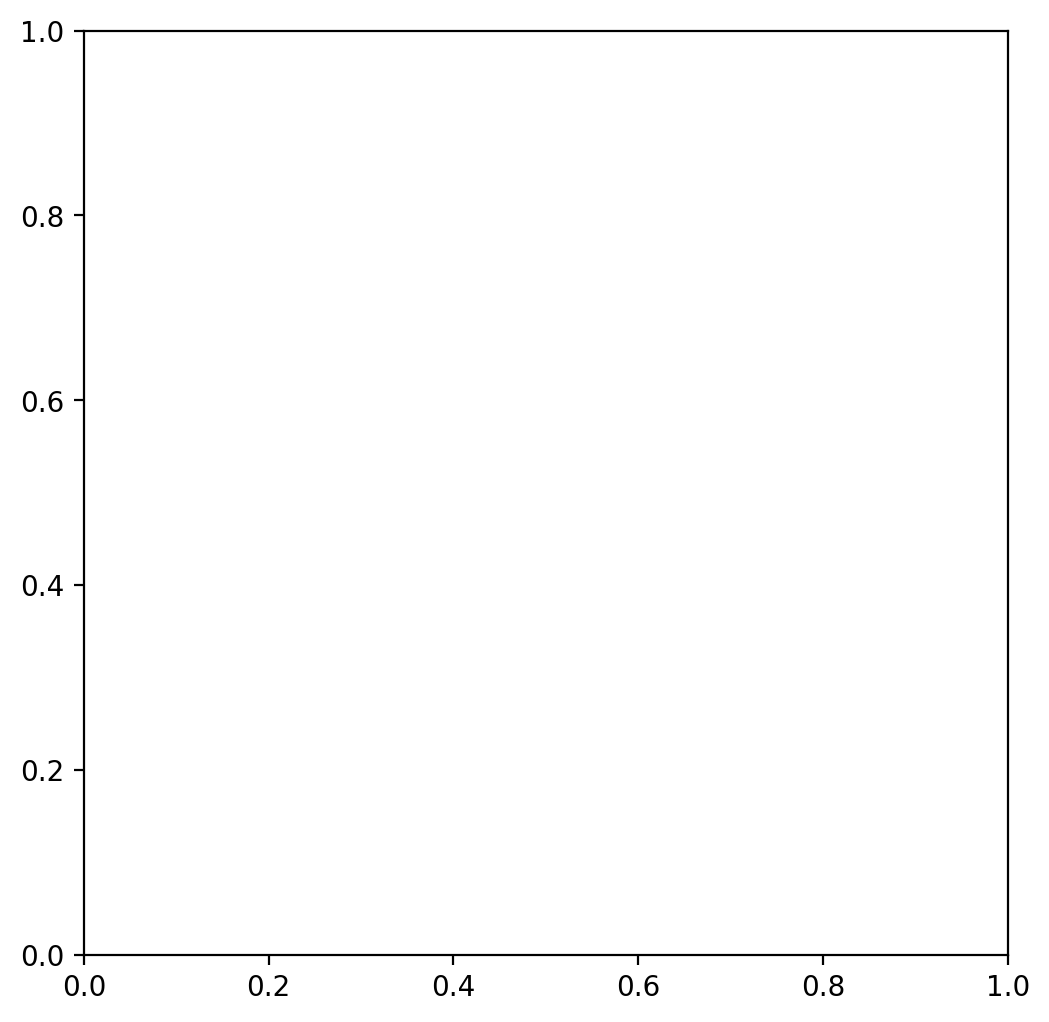

In [12]:
def create_advanced_music_box_adaptation(score, music_box_notes, output_path):
    """
    Create a music box adaptation using a comprehensive approach:
    1. Transpose all notes down by 8 semitones
    2. For unmatched notes, try shifting up one octave
    3. If still unmatched, find closest available note by moving down semitones
    """
    from music21 import stream, note, chord, expressions, pitch
    import copy
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Create a deep copy of the score
    adapted_score = copy.deepcopy(score)
    
    # Track all modifications for visualization
    adjustments = {
        'original': [],            # Original notes
        'transposed': [],          # After -8 semitone transposition
        'octave_shifted': [],      # Notes that needed octave shifting
        'fine_tuned': [],          # Notes that needed fine-tuning
        'original_midi': [],
        'transposed_midi': [],
        'octave_shifted_midi': [],
        'fine_tuned_midi': []
    }
    
    # Statistics counters
    stats = {
        'total_notes': 0,
        'direct_matches': 0,
        'octave_shifted': 0,
        'fine_tuned': 0,
        'perfect_matches': 0       # Notes that match perfectly after adaptation
    }
    
    # Process all notes in the score
    for part in adapted_score.parts:
        # First transpose all notes by -8 semitones
        for element in part.recurse():
            if isinstance(element, note.Note):
                # Save original for tracking
                original_pitch = copy.deepcopy(element.pitch)
                
                # Transpose by -8 semitones
                element.pitch.transpose(-8, inPlace=True)
                transposed_pitch = copy.deepcopy(element.pitch)
                
                # Track this for later visualization
                stats['total_notes'] += 1
                adjustments['original'].append(original_pitch.nameWithOctave)
                adjustments['transposed'].append(transposed_pitch.nameWithOctave)
                adjustments['original_midi'].append(original_pitch.midi)
                adjustments['transposed_midi'].append(transposed_pitch.midi)
                
                # Check if directly available on music box
                if transposed_pitch.nameWithOctave in music_box_notes:
                    stats['direct_matches'] += 1
                    stats['perfect_matches'] += 1
                    
                    # No adjustment needed
                    adjustments['octave_shifted'].append(None)
                    adjustments['fine_tuned'].append(None)
                    adjustments['octave_shifted_midi'].append(None)
                    adjustments['fine_tuned_midi'].append(None)
                else:
                    # Try octave shift
                    octave_shifted = copy.deepcopy(transposed_pitch)
                    octave_shifted.transpose(12, inPlace=True)
                    
                    if octave_shifted.nameWithOctave in music_box_notes:
                        # Octave shift worked
                        element.pitch = octave_shifted
                        element.expressions.append(expressions.TextExpression('↑'))
                        stats['octave_shifted'] += 1
                        stats['perfect_matches'] += 1
                        
                        # Track octave shift
                        adjustments['octave_shifted'].append(octave_shifted.nameWithOctave)
                        adjustments['octave_shifted_midi'].append(octave_shifted.midi)
                        adjustments['fine_tuned'].append(None)
                        adjustments['fine_tuned_midi'].append(None)
                    else:
                        # Need fine-tuning - try to find closest match by moving down semitones
                        fine_tuned_pitch = find_closest_available_note_down(octave_shifted, music_box_notes)
                        
                        if fine_tuned_pitch:
                            element.pitch = fine_tuned_pitch
                            element.expressions.append(expressions.TextExpression('↑↓'))
                            stats['octave_shifted'] += 1
                            stats['fine_tuned'] += 1
                            
                            # Track both adjustments
                            adjustments['octave_shifted'].append(octave_shifted.nameWithOctave)
                            adjustments['octave_shifted_midi'].append(octave_shifted.midi)
                            adjustments['fine_tuned'].append(fine_tuned_pitch.nameWithOctave)
                            adjustments['fine_tuned_midi'].append(fine_tuned_pitch.midi)
                        else:
                            # Try fine-tuning the original transposed note
                            fine_tuned_pitch = find_closest_available_note_down(transposed_pitch, music_box_notes)
                            
                            if fine_tuned_pitch:
                                element.pitch = fine_tuned_pitch
                                element.expressions.append(expressions.TextExpression('↓'))
                                stats['fine_tuned'] += 1
                                
                                # Track fine-tuning only
                                adjustments['octave_shifted'].append(None)
                                adjustments['octave_shifted_midi'].append(None)
                                adjustments['fine_tuned'].append(fine_tuned_pitch.nameWithOctave)
                                adjustments['fine_tuned_midi'].append(fine_tuned_pitch.midi)
                            else:
                                # No solution found - keep transposed version
                                element.expressions.append(expressions.TextExpression('✗'))
                                
                                # Track as unmatched
                                adjustments['octave_shifted'].append(None)
                                adjustments['octave_shifted_midi'].append(None)
                                adjustments['fine_tuned'].append(None)
                                adjustments['fine_tuned_midi'].append(None)
            
            elif isinstance(element, chord.Chord):
                # Handle chord notes individually and recreate chord
                original_pitches = []
                transposed_pitches = []
                new_pitches = []
                
                for p in element.pitches:
                    stats['total_notes'] += 1
                    
                    # Save original for tracking
                    original_pitch = copy.deepcopy(p)
                    original_pitches.append(original_pitch)
                    
                    # Transpose by -8 semitones
                    transposed_pitch = copy.deepcopy(p)
                    transposed_pitch.transpose(-8, inPlace=True)
                    transposed_pitches.append(transposed_pitch)
                    
                    # Track for visualization
                    adjustments['original'].append(original_pitch.nameWithOctave)
                    adjustments['transposed'].append(transposed_pitch.nameWithOctave)
                    adjustments['original_midi'].append(original_pitch.midi)
                    adjustments['transposed_midi'].append(transposed_pitch.midi)
                    
                    # Check if directly available
                    if transposed_pitch.nameWithOctave in music_box_notes:
                        stats['direct_matches'] += 1
                        stats['perfect_matches'] += 1
                        new_pitches.append(transposed_pitch)
                        
                        # No adjustment needed
                        adjustments['octave_shifted'].append(None)
                        adjustments['fine_tuned'].append(None)
                        adjustments['octave_shifted_midi'].append(None)
                        adjustments['fine_tuned_midi'].append(None)
                    else:
                        # Try octave shift
                        octave_shifted = copy.deepcopy(transposed_pitch)
                        octave_shifted.transpose(12, inPlace=True)
                        
                        if octave_shifted.nameWithOctave in music_box_notes:
                            # Octave shift worked
                            new_pitches.append(octave_shifted)
                            stats['octave_shifted'] += 1
                            stats['perfect_matches'] += 1
                            
                            # Track octave shift
                            adjustments['octave_shifted'].append(octave_shifted.nameWithOctave)
                            adjustments['octave_shifted_midi'].append(octave_shifted.midi)
                            adjustments['fine_tuned'].append(None)
                            adjustments['fine_tuned_midi'].append(None)
                        else:
                            # Need fine-tuning
                            fine_tuned_pitch = find_closest_available_note_down(octave_shifted, music_box_notes)
                            
                            if fine_tuned_pitch:
                                new_pitches.append(fine_tuned_pitch)
                                stats['octave_shifted'] += 1
                                stats['fine_tuned'] += 1
                                
                                # Track both adjustments
                                adjustments['octave_shifted'].append(octave_shifted.nameWithOctave)
                                adjustments['octave_shifted_midi'].append(octave_shifted.midi)
                                adjustments['fine_tuned'].append(fine_tuned_pitch.nameWithOctave)
                                adjustments['fine_tuned_midi'].append(fine_tuned_pitch.midi)
                            else:
                                # Try fine-tuning the original transposed note
                                fine_tuned_pitch = find_closest_available_note_down(transposed_pitch, music_box_notes)
                                
                                if fine_tuned_pitch:
                                    new_pitches.append(fine_tuned_pitch)
                                    stats['fine_tuned'] += 1
                                    
                                    # Track fine-tuning only
                                    adjustments['octave_shifted'].append(None)
                                    adjustments['octave_shifted_midi'].append(None)
                                    adjustments['fine_tuned'].append(fine_tuned_pitch.nameWithOctave)
                                    adjustments['fine_tuned_midi'].append(fine_tuned_pitch.midi)
                                else:
                                    # No solution found - keep transposed version
                                    new_pitches.append(transposed_pitch)
                                    
                                    # Track as unmatched
                                    adjustments['octave_shifted'].append(None)
                                    adjustments['octave_shifted_midi'].append(None)
                                    adjustments['fine_tuned'].append(None)
                                    adjustments['fine_tuned_midi'].append(None)
                
                # Set adjusted pitches and add expression mark if needed
                element.pitches = tuple(new_pitches)
                
                # Add appropriate expressions based on what happened to this chord
                adjustment_types = []
                if any(p.nameWithOctave not in music_box_notes for p in new_pitches):
                    element.expressions.append(expressions.TextExpression('✗'))
                elif any(p.nameWithOctave != tp.nameWithOctave for p, tp in zip(new_pitches, transposed_pitches)):
                    used_adjustments = []
                    if stats['octave_shifted'] > stats['direct_matches']:
                        used_adjustments.append('↑')
                    if stats['fine_tuned'] > 0:
                        used_adjustments.append('↓')
                    element.expressions.append(expressions.TextExpression(''.join(used_adjustments)))
    
    # Update metadata
    if hasattr(adapted_score, 'metadata') and adapted_score.metadata is not None:
        if hasattr(adapted_score.metadata, 'title') and adapted_score.metadata.title:
            adapted_score.metadata.title = f"{adapted_score.metadata.title} (Music Box Adaptation)"
        
        if hasattr(adapted_score.metadata, 'composer') and adapted_score.metadata.composer:
            adapted_score.metadata.composer += " (Arranged for 30-note Music Box)"
    
    # Save to file
    try:
        adapted_score.write('musicxml', fp=output_path)
        print(f"Successfully saved adaptation to {output_path}")
    except Exception as e:
        print(f"Error saving adaptation: {str(e)}")
        alt_path = output_path.replace('.mxl', '.mid')
        adapted_score.write('midi', fp=alt_path)
        print(f"Saved as MIDI instead: {alt_path}")
    
    # Print adaptation summary
    print("\nAdvanced Music Box Adaptation Summary:")
    print(f"Total notes: {stats['total_notes']}")
    print(f"Direct matches after -8 semitone transposition: {stats['direct_matches']} ({stats['direct_matches']/stats['total_notes']*100:.1f}%)")
    print(f"Notes requiring octave shift: {stats['octave_shifted']} ({stats['octave_shifted']/stats['total_notes']*100:.1f}%)")
    print(f"Notes requiring fine-tuning: {stats['fine_tuned']} ({stats['fine_tuned']/stats['total_notes']*100:.1f}%)")
    print(f"Perfect matches after all adjustments: {stats['perfect_matches']} ({stats['perfect_matches']/stats['total_notes']*100:.1f}%)")
    
    # Create detailed visualization
    create_adaptation_visualization(adjustments, music_box_notes)
    
    return adapted_score, adjustments, stats

def find_closest_available_note_down(note_pitch, music_box_notes, max_semitones=3):
    """Find the closest available note by moving down semitones, maximum 3 semitones"""
    from music21 import pitch
    
    # Convert all music box notes to MIDI numbers for comparison
    music_box_midi = [pitch.Pitch(mbx_note).midi for mbx_note in music_box_notes]
    
    # Get target MIDI number
    target_midi = note_pitch.midi
    
    # Try progressively moving down by semitones
    for semitones in range(1, max_semitones + 1):
        test_midi = target_midi - semitones
        
        # If this MIDI number is available in the music box
        if test_midi in music_box_midi:
            # Create the pitch object
            p = pitch.Pitch()
            p.midi = test_midi
            return p
    
    # If no match found within limit
    return None

def create_adaptation_visualization(adjustments, music_box_notes):
    """Create a detailed visualization of the adaptation process"""
    import matplotlib.pyplot as plt
    import numpy as np
    from music21 import pitch
    
    # Convert all music box notes to MIDI numbers
    music_box_midi = [pitch.Pitch(note).midi for note in music_box_notes]
    
    # Create figure
    plt.figure(figsize=(20, 8))
    
    # Define row positions
    row_positions = {
        'original': 3.5,
        'transposed': 2.5,
        'octave_shifted': 1.5,
        'fine_tuned': 0.5,
        'music_box': 0.0
    }
    
    # Plot music box notes
    plt.scatter(music_box_midi, [row_positions['music_box']] * len(music_box_midi),
               s=100, color='crimson', alpha=0.7, marker='o', label='Music Box Notes')
    
    # Plot original notes
    plt.scatter(adjustments['original_midi'], [row_positions['original']] * len(adjustments['original_midi']),
               s=80, color='royalblue', alpha=0.7, marker='o', label='Original Notes')
    
    # Plot transposed notes (-8 semitones)
    plt.scatter(adjustments['transposed_midi'], [row_positions['transposed']] * len(adjustments['transposed_midi']),
               s=80, color='green', alpha=0.7, marker='o', label='-8 Semitones')
    
    # Draw lines from original to transposed
    for i in range(len(adjustments['original_midi'])):
        plt.plot([adjustments['original_midi'][i], adjustments['transposed_midi'][i]],
                [row_positions['original'], row_positions['transposed']],
                'k-', alpha=0.1)
    
    # Plot octave-shifted notes
    octave_shifted_indices = [i for i, val in enumerate(adjustments['octave_shifted_midi']) if val is not None]
    if octave_shifted_indices:
        octave_shifted_midi = [adjustments['octave_shifted_midi'][i] for i in octave_shifted_indices]
        transposed_midi = [adjustments['transposed_midi'][i] for i in octave_shifted_indices]
        
        plt.scatter(octave_shifted_midi, [row_positions['octave_shifted']] * len(octave_shifted_midi),
                   s=80, color='orange', alpha=0.7, marker='^', label='Octave Shifted')
        
        # Draw lines from transposed to octave-shifted
        for i in range(len(octave_shifted_midi)):
            plt.plot([transposed_midi[i], octave_shifted_midi[i]],
                    [row_positions['transposed'], row_positions['octave_shifted']],
                    'orange', alpha=0.4)
    
    # Plot fine-tuned notes
    fine_tuned_indices = [i for i, val in enumerate(adjustments['fine_tuned_midi']) if val is not None]
    if fine_tuned_indices:
        fine_tuned_midi = [adjustments['fine_tuned_midi'][i] for i in fine_tuned_indices]
        
        # Determine source position for each fine-tuned note
        source_positions = []
        source_midi = []
        
        for i in fine_tuned_indices:
            if adjustments['octave_shifted_midi'][i] is not None:
                source_positions.append(row_positions['octave_shifted'])
                source_midi.append(adjustments['octave_shifted_midi'][i])
            else:
                source_positions.append(row_positions['transposed'])
                source_midi.append(adjustments['transposed_midi'][i])
        
        plt.scatter(fine_tuned_midi, [row_positions['fine_tuned']] * len(fine_tuned_midi),
                   s=80, color='purple', alpha=0.7, marker='s', label='Fine-Tuned')
        
        # Draw lines from source to fine-tuned
        for i in range(len(fine_tuned_midi)):
            plt.plot([source_midi[i], fine_tuned_midi[i]],
                    [source_positions[i], row_positions['fine_tuned']],
                    'purple', alpha=0.4)
    
    # Add reference lines for octaves
    for octave in range(0, 9):
        c_midi = 12 + (octave * 12)  # MIDI number for C in this octave
        plt.axvline(x=c_midi, color='gray', linestyle='--', alpha=0.3)
        plt.text(c_midi, 4.0, f"C{octave}", fontsize=10, ha='center')
    
    # Improve layout
    plt.yticks(list(row_positions.values()), 
              ['Music Box', 'Fine-Tuned', 'Octave Shifted', '-8 Semitones', 'Original'])
    plt.xlabel('MIDI Note Number')
    plt.title('Music Box Adaptation Process Visualization', fontsize=14)
    plt.xlim(min(music_box_midi) - 5, max(adjustments['original_midi']) + 5)
    plt.ylim(-0.5, 4.0)
    
    # Clean up
    plt.grid(axis='x', alpha=0.1)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # Create summary chart
    plt.figure(figsize=(10, 6))
    categories = ['Direct Matches', 'Octave Shifted', 'Fine-Tuned', 'Unmatched']
    total = len(adjustments['original_midi'])
    
    # Calculate counts for each category
    direct_match_count = sum(1 for i in range(total) 
                           if adjustments['transposed_midi'][i] in music_box_midi)
    
    octave_shift_count = sum(1 for i in range(total) 
                          if adjustments['octave_shifted_midi'][i] is not None and 
                          adjustments['fine_tuned_midi'][i] is None)
    
    fine_tuned_count = sum(1 for i in range(total) 
                         if adjustments['fine_tuned_midi'][i] is not None)
    
    unmatched_count = total - direct_match_count - octave_shift_count - fine_tuned_count
    
    counts = [direct_match_count, octave_shift_count, fine_tuned_count, unmatched_count]
    
    # Create pie chart
    colors = ['green', 'orange', 'purple', 'red']
    plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
    plt.axis('equal')
    plt.title('Distribution of Note Adaptations')
    plt.show()

# Create the adaptation with advanced adjustments
output_path = "/workspaces/codespaces-jupyter/music/music_box_advanced_adaptation.mxl"
adapted_score, adjustments, stats = create_advanced_music_box_adaptation(score, music_box_notes, output_path)